<a href="https://colab.research.google.com/github/vshiv667/Sign-Language-Recognition/blob/master/Hand_Gesture_(Sign_Language)_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

# Uploading train and test files


In [0]:
uploaded=files.upload() 

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


# Extract Features and labels

In [0]:
def get_data(filename): #fn to extract labels & features from train or test .csv file
    with open(filename) as training_file:
        data = np.loadtxt(training_file, skiprows=1, delimiter=",")
        labels = data[:,0]
        images = data[:,1:]
    return images, labels

training_images, training_labels = get_data('sign_mnist_train.csv') #call fn
testing_images, testing_labels = get_data('sign_mnist_test.csv')

training_images= training_images.reshape(27455, 28, 28) #784 pixels reshaped to 28 x 28 2D image
testing_images = testing_images.reshape(7172, 28, 28) 

# Print shape
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)


(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


#Image Augmentation

In [0]:

training_images = np.expand_dims(training_images, axis=3) #channels = 1, as grayscale
testing_images = np.expand_dims(testing_images, axis=3)

#Create an ImageDataGenerator and do Image Augmentation for better generalization performance
train_datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.25,
    vertical_flip=True,
    horizontal_flip=True,
    fill_mode='nearest'
)

testing_images = testing_images/255

# Using to_categorical to convert labels to a binary matrix 
from tensorflow.keras.utils import to_categorical

training_labels = to_categorical(training_labels, num_classes=None)
testing_labels = to_categorical(testing_labels, num_classes=None)


In [0]:
# Print shape
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28, 1)
(27455, 25)
(7172, 28, 28, 1)
(7172, 25)


# Convolutional Neural Network Model

In [0]:

model = tf.keras.models.Sequential([
  
    # The first convolution layer with 64 convolutions and 3x3 filter
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)), 
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
   
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # add a dropout layer to counter overfittting
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), #Hidden Layer 1 with ReLu activation function giving max(0,val)
    tf.keras.layers.Dense(25, activation='softmax') #Output Layer with 25 labels and probabilities of each class using softmax activation function
])

model.summary() #view summary

# Compile Model
model.compile(loss = 'categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
#using cce loss function as targets are one hot encoded, with adaptive gradient descent and desired metric

# Train the Model
history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=20), epochs=10, validation_data=(testing_images, testing_labels), steps_per_epoch=len(training_images)/20 )
#each epoch: steps per epoch * batch size ~ training image instances

model.evaluate(testing_images, testing_labels) #evaluate loss and accuracy on test images


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)              

[0.5744403004646301, 0.794060230255127]

#Visualize Loss and Accuracy on Train & Validation

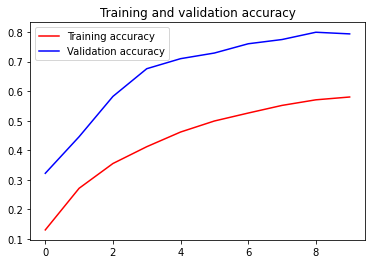

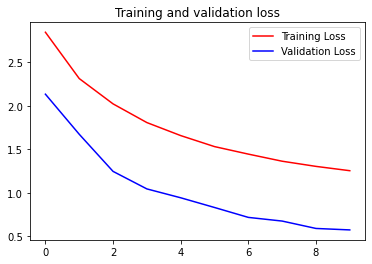

In [0]:

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()